# Skin detection
## Ballestrasse Camillo (Lorenzo Brizzi)

In [128]:
import cv2
from matplotlib import pyplot as plt

tema (titolo)
Cognome Nome (eventuali collaboratori)
contesto/intro teorica -> circa 5 righe
lista obiettivi
metodi usati
analisi esperimenti
conclusioni brevi

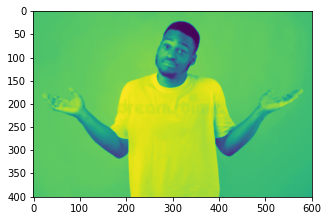

In [129]:
img = cv2.imread('images/boyazure.jpeg') 

img1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img1 = cv2.medianBlur(img1,5)
plt.figure(figsize=(5,10))
plt.imshow(img1);

# Sogliatura

<Figure size 1080x720 with 0 Axes>

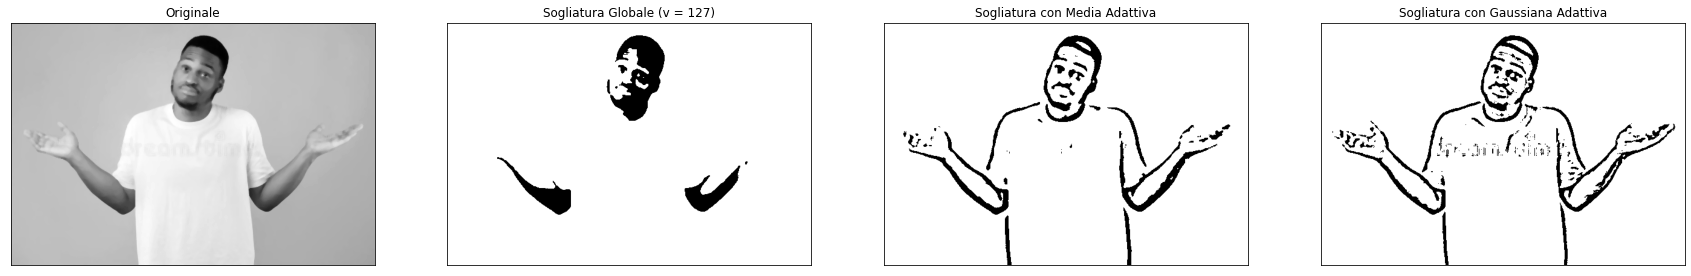

In [130]:

ret,th1 = cv2.threshold(img1,127,255,cv2.THRESH_BINARY)

th2 = cv2.adaptiveThreshold(img1, 255, 
                        cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 21, 10)
th3 = cv2.adaptiveThreshold(img1, 255, 
                        cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 21, 4)

titles = ['Originale', 'Sogliatura Globale (v = 127)',
            'Sogliatura con Media Adattiva', 'Sogliatura con Gaussiana Adattiva']
plt.figure(figsize=(15,10))

images = [img1, th1, th2, th3]
plt.figure(figsize=(30,10))

for i in range(4):
    plt.subplot(1,4,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
#plt.tight_layout()
plt.show()

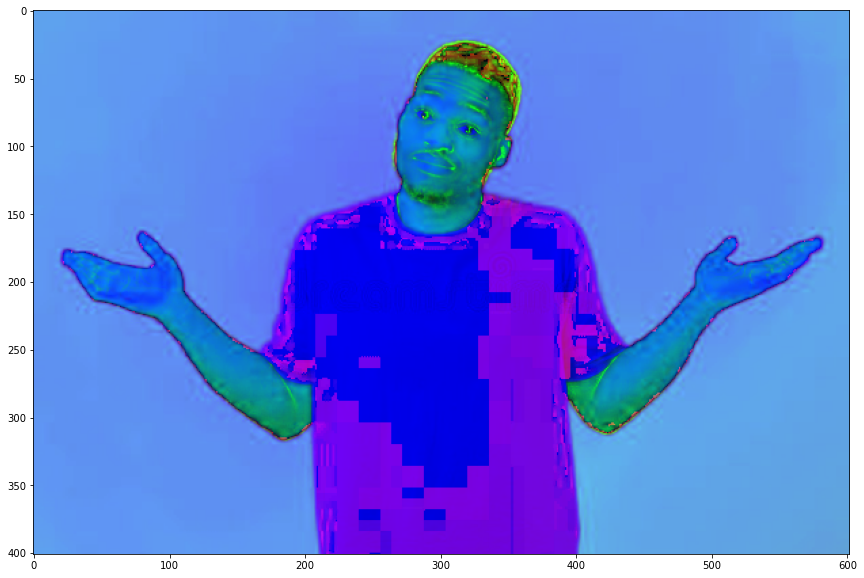

In [131]:
#conversione in HSV
HSV_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.figure(figsize=(15,10))
plt.imshow(HSV_img);

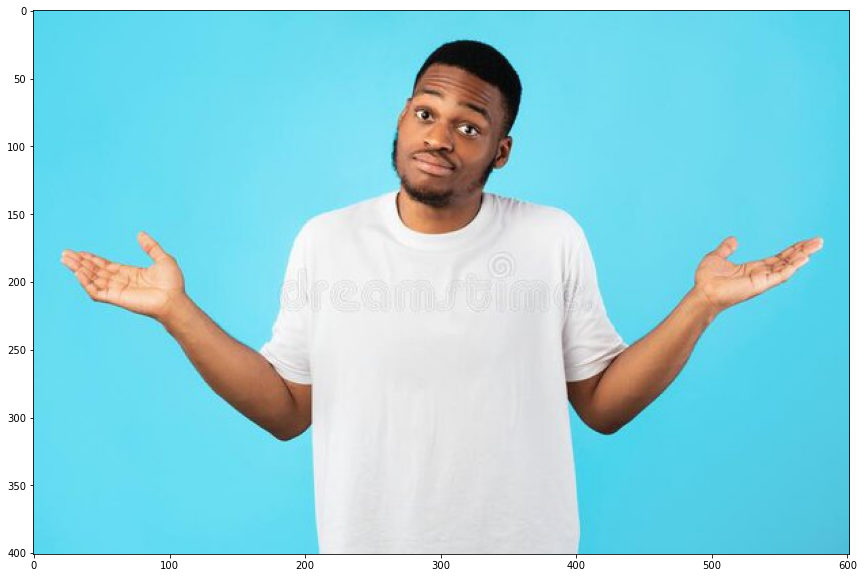

In [132]:
#conversione in RGB
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(15,10))
plt.imshow(RGB_img);


# HSV 

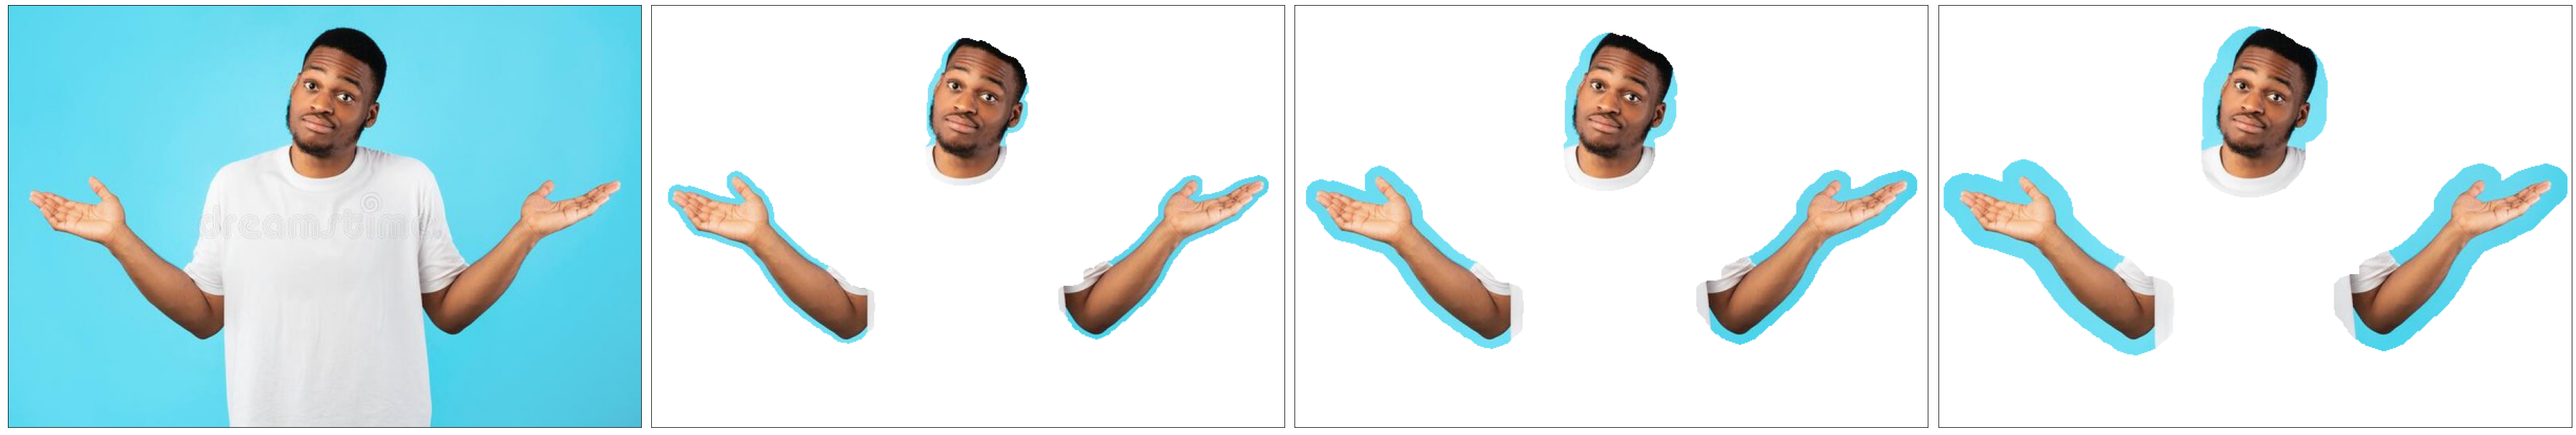

In [133]:
#RGB: (141, 85, 36)
#RGB: (255, 219, 172)

#HSV: (28, 74, 55)
#HSV: (33, 32, 100)

#YCrCb: (0, 133, 80)
#YCrCb: (80, 173, 120)

#coppia.jpg [0,46,40] [20,150,255]
#boyazure -> 1 - 0


#limite inferiore e superiore di valori HSV per la pelle
lower = np.array([0, 36, 40],np.uint8)
upper = np.array([61, 160, 255],np.uint8)

#crea maschera pelle
skinMask = cv2.inRange(HSV_img, lower, upper)
skinMask2 = cv2.inRange(HSV_img, lower, upper)
skinMask3 = cv2.inRange(HSV_img, lower, upper)


# blur sulla maschera per ridurre il rumore 
skinMask = cv2.GaussianBlur(skinMask, (3, 3), 0)
skinMask2 = cv2.GaussianBlur(skinMask2, (3, 3), 0)
skinMask3 = cv2.GaussianBlur(skinMask2, (3, 3), 0)

#approssimazione della maschera
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))

#filtri morfologici (erodi per gli occhi e narici, dilata per prendere più pixel)
skinMask = cv2.erode(skinMask, kernel, iterations = 0)
skinMask = cv2.dilate(skinMask, kernel, iterations = 1)

skinMask2 = cv2.erode(skinMask2, kernel, iterations = 0)
skinMask2 = cv2.dilate(skinMask2, kernel, iterations = 2)

skinMask3 = cv2.erode(skinMask3, kernel, iterations = 0)
skinMask3 = cv2.dilate(skinMask3, kernel, iterations = 3)

#applicazione della maschera tramite il bitwise
skin = cv2.bitwise_not(img, mask = skinMask)
skin = cv2.bitwise_not(skin, mask = None)
skin = cv2.cvtColor(skin, cv2.COLOR_BGR2RGB)

skin2 = cv2.bitwise_not(img, mask = skinMask2)
skin2 = cv2.bitwise_not(skin2, mask = None)
skin2 = cv2.cvtColor(skin2, cv2.COLOR_BGR2RGB)

skin3 = cv2.bitwise_not(img, mask = skinMask3)
skin3 = cv2.bitwise_not(skin3, mask = None)
skin3 = cv2.cvtColor(skin3, cv2.COLOR_BGR2RGB)


#titles = ['Immagine Originale', 'Maschera HSV', 'Maschera HSV, dilate+', 'Maschera HSV, dilate++']
images = [RGB_img, skin, skin2, skin3] 

plt.figure(figsize=(50,20))
for i in range(4):
    plt.subplot(1,4,i+1),plt.imshow(images[i],'gray')
    #plt.title(titles[i], fontsize = 50)
    plt.xticks([]),plt.yticks([])
plt.tight_layout()
plt.show()




#plt.imshow(skin);

# YCrCb

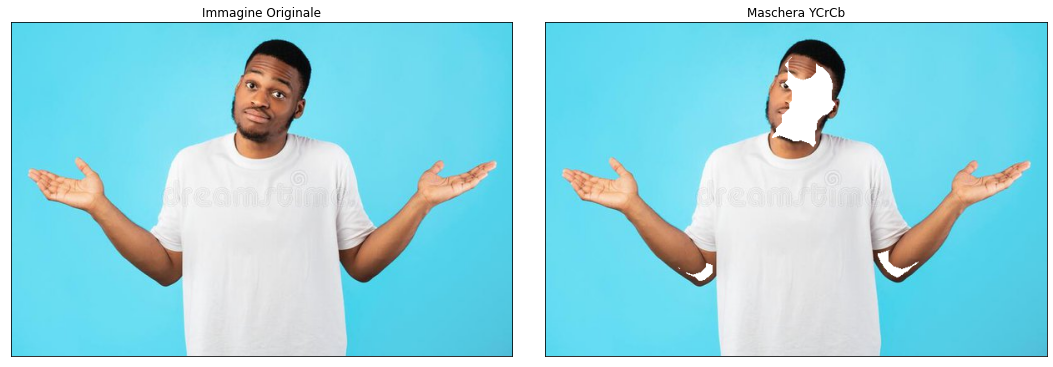

In [134]:
#valori limite per la pelle
#min_YCrCb= np.array([11, 122, 129],np.uint8)
#max_YCrCb= np.array([161, 155, 155],np.uint8)
min_YCrCb = np.array([0, 133, 80],np.uint8)
max_YCrCb = np.array([80, 173, 120],np.uint8)

image = cv2.imread("images/boyazure.jpeg")
imageYCrCb = cv2.cvtColor(image,cv2.COLOR_BGR2YCR_CB)   
#maschera pelle
skinRegionYCrCb = cv2.inRange(imageYCrCb,min_YCrCb,max_YCrCb)
# blur 
skinRegionYCrCb = cv2.GaussianBlur(skinRegionYCrCb, (3, 3), 0)

#approssima maschera
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))
skinRegionYCrCb = cv2.dilate(skinRegionYCrCb, kernel, iterations = 2)
skinRegionYCrCb = cv2.erode(skinRegionYCrCb, kernel, iterations = 3)


#applica maschera
skin2 = cv2.bitwise_not(image, mask = skinRegionYCrCb)
skin2 = cv2.bitwise_xor(skin2, image, mask = None)


#v2.imwrite("images/oscar.jpeg", np.hstack([image,RGB_skin]))

#converti immagine in RGB
RGB_skin = cv2.cvtColor(skin2, cv2.COLOR_BGR2RGB)

titles = ['Immagine Originale', 'Maschera YCrCb']
images = [RGB_img, RGB_skin]

plt.figure(figsize=(15,10))
for i in range(2):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.tight_layout()
plt.show()


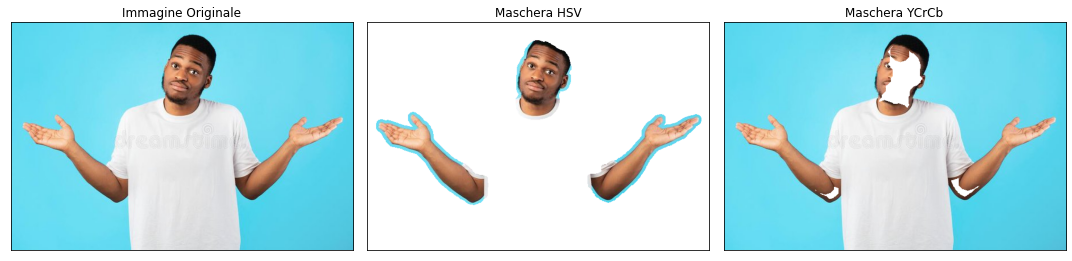

In [135]:
titles = ['Immagine Originale', 'Maschera HSV', 'Maschera YCrCb']
images = [RGB_img, skin, RGB_skin]

plt.figure(figsize=(15,10))
for i in range(3):
    plt.subplot(1,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.tight_layout()
plt.show()